In [1]:
import numpy as np

# Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer. Along with this, we'll build on our matplotlib examples from the previous section and show some examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

- n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
- n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

# A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn. The data consists of measurements of three different species of irises. We have 150 observations of the iris flower specifying some measurements: sepal length, sepal width, petal length and petal width together with its species: Iris setosa, Iris versicolor, Iris virginica.

To load the dataset into a Python object:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

The data is stored in the .data member, which is a (n_samples, n_features) array.

In [3]:
n_samples, n_features = iris.data.shape
n_samples, n_features

(150, 4)

The 4 features correspond to:

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The class of each observation is stored in the .target attribute of the dataset. This is an integer 1D array of length n_samples:

In [5]:
iris.target.shape

(150,)

We can see that there are 3 classes in this dataset, corresponding to the three species of Iris.

In [6]:
np.unique(iris.target)

array([0, 1, 2])

The three class names are stored in:

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

The data is four dimensional - it has four features - but we can visualise two of the dimensions at a time using a simple scatter-plot:

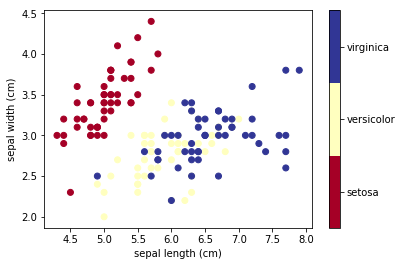

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(x_index, y_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *aplt.colorbarrgs: iris.target_names[int(i)])

    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.clim(-0.5, 2.5)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])
make_plot(0,1)

As there are relatively few dimensions we can plot all of the combinations to see in which features the four clases are most distinct.

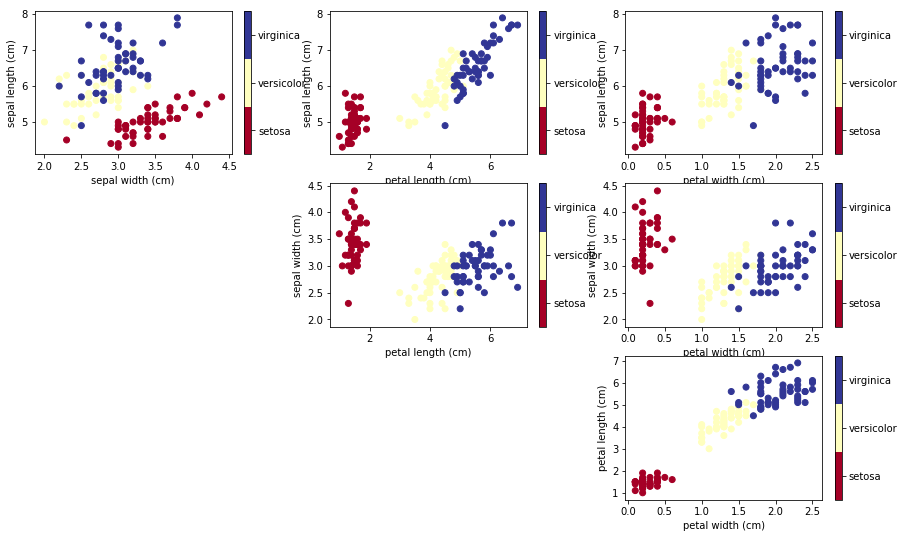

In [9]:
plt.figure(figsize=[15,9])
i = 1
for y in range(4):
    for x in range(4):
        if x > y:
            plt.subplot(3,3,i)
            make_plot(x,y)
        if x > 0:
            i += 1